In [1]:
#https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [3]:
housing = pd.read_csv("Housing_dataset.csv")

In [4]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


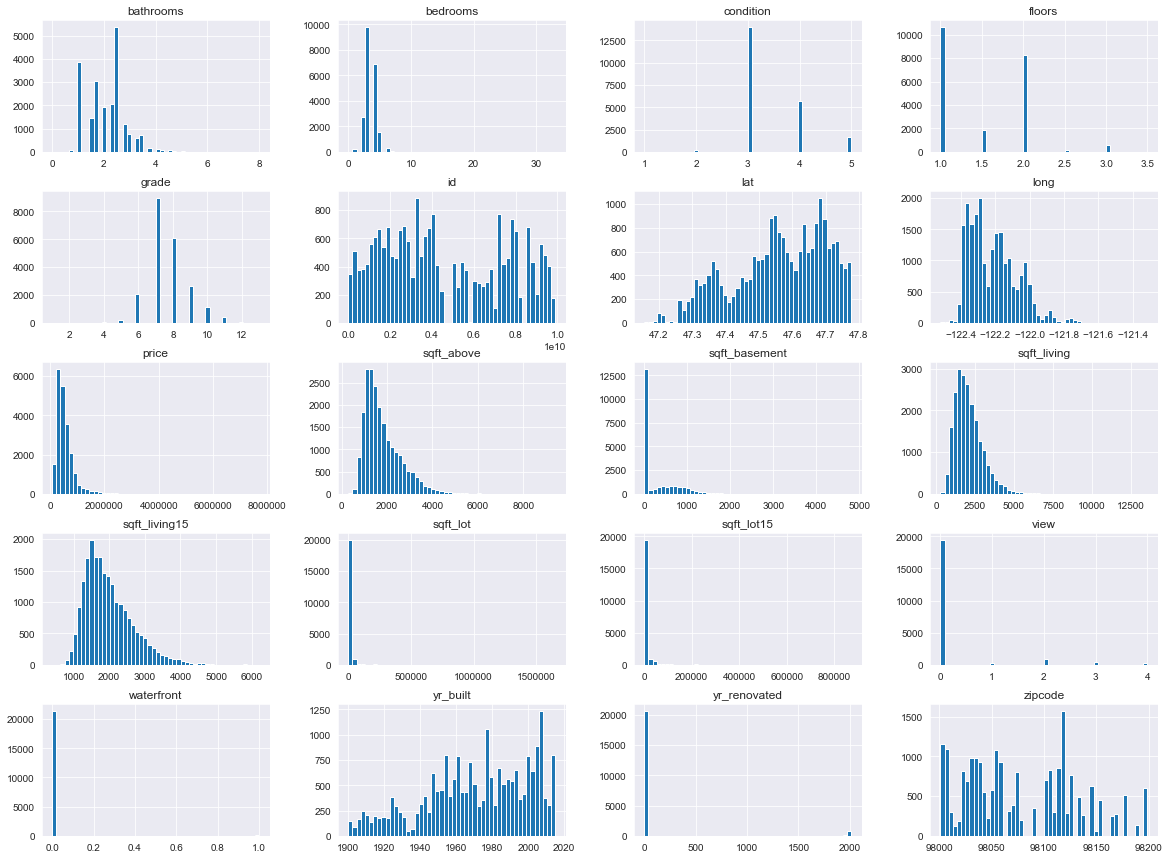

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F55AD9088>,
      dtype=object)

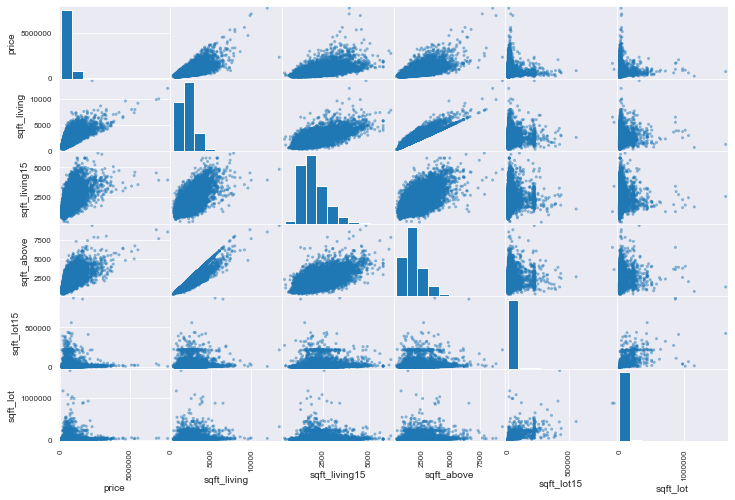

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["price", "sqft_living", "sqft_living15",
"sqft_above","sqft_lot15","sqft_lot"]
scatter_matrix(housing[attributes], figsize=(12, 8))

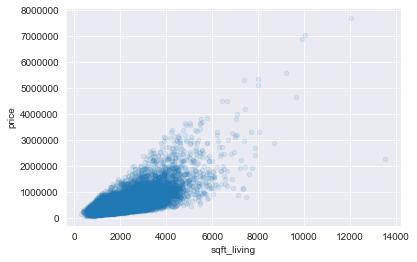

In [9]:
housing.plot(kind="scatter", x="sqft_living", y="price", alpha=0.1)

In [10]:
corr_matrix = housing.corr()

In [11]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [12]:
corr_housing = housing.drop("date", axis = True)


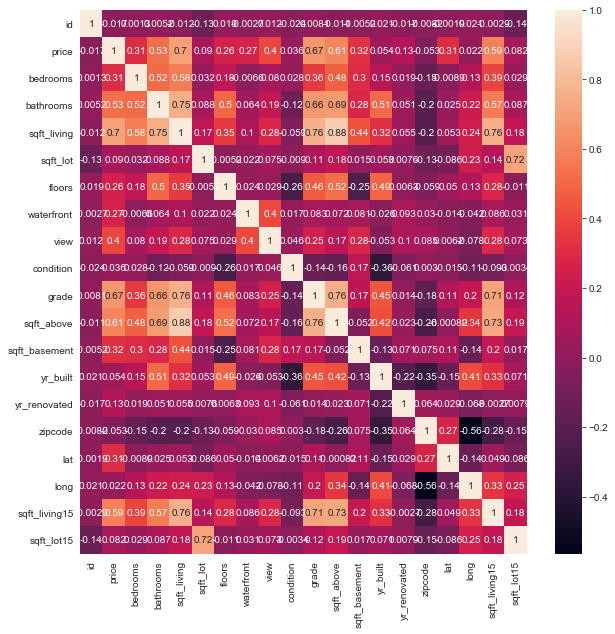

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True , ax = ax)

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
# train_set, test_set = split_train_test(housing, 0.2)

In [17]:
train_set, test_set = split_train_test_by_id(housing, 0.2, "id")

In [18]:
len(train_set)

17179

In [19]:
len(test_set)

4434

In [20]:
#Save the 'Id' column
train_ID = train_set['id']
test_ID = test_set['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_set.drop("id", axis = 1, inplace = True)
test_set.drop("id", axis = 1, inplace = True)


 mu = 542127.73 and sigma = 375649.27



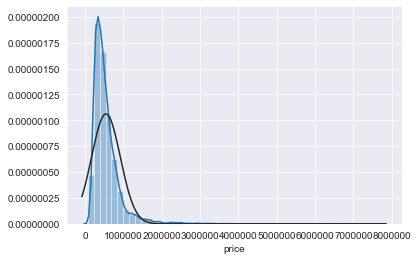

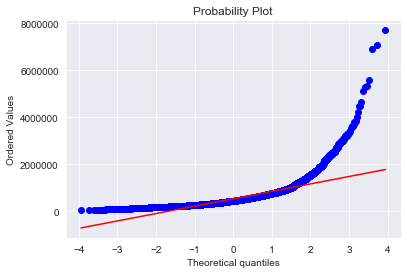

In [21]:
def check_skewness(col):
    sns.distplot(train_set[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train_set[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train_set[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('price')


 mu = 13.05 and sigma = 0.53



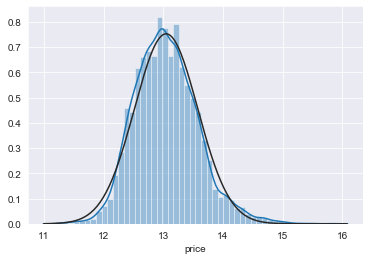

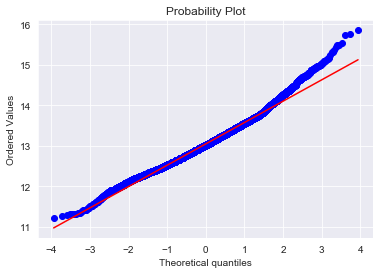

In [22]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_set["price"] = np.log1p(train_set["price"])

check_skewness('price')

In [23]:
ntrain = train_set.shape[0]
ntest = test_set.shape[0]
y_train = train_set.price.values
all_data = pd.concat((train_set, test_set)).reset_index(drop=True)
all_data.drop(["price","date","zipcode"], axis=1 , inplace = True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (21613, 17)


In [24]:
# Adding total sqfootage feature 
all_data['Total_area'] = all_data['sqft_living'] + all_data['sqft_above'] + all_data['sqft_basement'] + all_data['sqft_living15']
print("all_data size is : {}".format(all_data.shape))

all_data size is : (21613, 18)


In [26]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
sqft_lot,13.059113
waterfront,11.384318
sqft_lot15,9.506083
yr_renovated,4.549178
view,3.395514
bedrooms,1.974163
sqft_basement,1.577856
sqft_living,1.471453
sqft_above,1.446564
Total_area,1.303664


In [27]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 18 skewed numerical features to Box Cox transform


In [28]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(17179, 18)

In [29]:
train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Total_area
0,1.194318,0.730463,11.403697,19.874209,0.730463,0.0,0.0,1.540963,2.259674,11.403697,0.000000,14.076603,0.0,5.275655,NaN,15.166565,19.030382,16.685946
1,1.820334,1.540963,14.119786,17.253669,0.730463,0.0,0.0,2.055642,2.440268,12.263269,11.861673,14.127727,0.0,5.267660,NaN,13.011628,17.253669,17.449938
2,1.540963,1.194318,13.644922,19.038978,0.730463,0.0,0.0,1.540963,2.602594,13.644922,0.000000,14.162467,0.0,5.271199,NaN,13.856095,18.754921,17.366933
3,1.820334,1.942540,17.544775,30.930462,0.730463,0.0,0.0,1.540963,3.011340,16.369909,13.362137,14.184404,0.0,5.272646,NaN,17.077857,30.930462,21.704788
4,1.540963,1.289269,13.707804,18.393064,1.194318,0.0,0.0,1.540963,2.440268,13.707804,0.000000,14.175018,0.0,5.259857,NaN,14.537287,18.393064,17.707777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17174,1.540963,1.378202,13.362137,12.475263,1.540963,0.0,0.0,1.540963,2.602594,13.362137,0.000000,14.196881,0.0,5.274236,NaN,13.362137,13.320686,16.948708
17175,1.820334,1.378202,14.638196,17.800292,1.194318,0.0,0.0,1.540963,2.602594,14.638196,0.000000,14.204657,0.0,5.267288,NaN,13.907014,18.598238,18.184844
17176,1.194318,0.583775,12.181217,12.989872,1.194318,0.0,0.0,1.540963,2.440268,12.181217,0.000000,14.196881,0.0,5.270374,NaN,12.181217,14.193765,15.555594
17177,1.540963,1.378202,13.496904,14.744541,1.194318,0.0,0.0,1.540963,2.602594,13.496904,0.000000,14.189087,0.0,5.268166,NaN,13.118413,12.849572,16.964111


In [30]:
train.drop(["long"], axis =1 , inplace= True)

In [31]:
test.drop(["long"], axis =1 , inplace = True)

In [32]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [33]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [34]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2478 (0.0044)



In [35]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.2546 (0.0025)



In [36]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.2546 (0.0025)



In [37]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1860 (0.0037)



In [38]:
LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

In [39]:
test_Y = test_set["price"]
test_Y

0         221900.0
1         538000.0
15        650000.0
16        395000.0
19        230000.0
           ...    
21586     505000.0
21597    1575000.0
21599     810000.0
21600    1537000.0
21603     507250.0
Name: price, Length: 4434, dtype: float64

In [40]:
finalMd_lasso = np.expm1(LassoMd.predict(test.values))
finalMd_lasso

array([ 284199.47134939,  664020.72329224,  852129.56265731, ...,
        937785.42097056, 1122825.3564095 ,  484994.31965945])

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y, finalMd_lasso)

106176.60626611671

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, finalMd_lasso , squared= False)

175435.11699139007

In [43]:
from sklearn.metrics import mean_squared_error

line_mse = mean_squared_error(test_Y, finalMd_lasso , squared= False)
lin_rmse = np.sqrt(line_mse)
lin_rmse


418.8497546750983

In [44]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_Y , finalMd_lasso)

0.7229352022193861

In [45]:
from sklearn.metrics import r2_score
r2_score(test_Y , finalMd_lasso)

0.7205822563539066

In [46]:
finalMd_ENet = np.expm1(ENetMd.predict(test.values))
finalMd_ENet

array([ 283981.98464294,  664993.54249718,  852031.10688368, ...,
        937329.40510923, 1123944.34401439,  484629.10163249])

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y, finalMd_ENet)

106084.69448693658

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, finalMd_ENet , squared= False)

175234.58889238475

In [49]:
from sklearn.metrics import mean_squared_error

line_mse = mean_squared_error(test_Y, finalMd_ENet , squared= False)
lin_rmse = np.sqrt(line_mse)
lin_rmse


418.61030672020576

In [50]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_Y , finalMd_ENet)

0.7235579590521841

In [51]:
from sklearn.metrics import r2_score
r2_score(test_Y , finalMd_ENet)

0.7212206585988324

In [52]:
finalMd_KRRMd = np.expm1(KRRMd.predict(test.values))
finalMd_KRRMd

array([ 289463.42453421,  616884.3675848 ,  846577.06856931, ...,
        961988.21165281, 1367731.39994662,  461000.11325015])

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y, finalMd_KRRMd)

102310.03083887015

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, finalMd_KRRMd , squared= False)

165808.15258939032

In [55]:
from sklearn.metrics import mean_squared_error

line_mse = mean_squared_error(test_Y, finalMd_KRRMd , squared= False)
lin_rmse = np.sqrt(line_mse)
lin_rmse


407.19547221130824

In [56]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_Y , finalMd_KRRMd)

0.7529916030736064

In [57]:
from sklearn.metrics import r2_score
r2_score(test_Y , finalMd_KRRMd)

0.750406839343923

In [58]:
finalMd_GBoostMd = np.expm1(GBoostMd.predict(test.values))
finalMd_GBoostMd

array([ 251052.07356992,  564538.57858219,  771310.27480978, ...,
       1034849.67269361, 2050764.61100684,  528969.90488422])

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y, finalMd_GBoostMd)

71664.32270631574

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, finalMd_GBoostMd , squared= False)

123940.36303551294

In [61]:
from sklearn.metrics import mean_squared_error

line_mse = mean_squared_error(test_Y, finalMd_GBoostMd, squared= False)
lin_rmse = np.sqrt(line_mse)
lin_rmse


352.0516482499591

In [62]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_Y , finalMd_GBoostMd)

0.8608255601985367

In [63]:
from sklearn.metrics import r2_score
r2_score(test_Y , finalMd_GBoostMd)

0.8605410318639687

In [64]:
finalGB = np.expm1(GBoostMd.predict(test.values))
finalGB

array([ 251052.07356992,  564538.57858219,  771310.27480978, ...,
       1034849.67269361, 2050764.61100684,  528969.90488422])

In [65]:
test_Y = test_set["price"]
test_Y

0         221900.0
1         538000.0
15        650000.0
16        395000.0
19        230000.0
           ...    
21586     505000.0
21597    1575000.0
21599     810000.0
21600    1537000.0
21603     507250.0
Name: price, Length: 4434, dtype: float64

In [67]:
# from sklearn.metrics import mean_squared_error

# lin_mse = mean_squared_error(finalMd, test_Y)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [ ]:
# lin_mse = mean_squared_error(finalGB, test_Y)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [ ]:
# from sklearn.metrics import explained_variance_score

In [ ]:
# explained_variance_score(finalMd, test_Y, multioutput='uniform_average')

In [ ]:
# explained_variance_score(finalGB, test_Y, multioutput='uniform_average')